Installing libraries and packages

In [22]:
!python -m pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 863 kB 7.4 MB/s 
     |████████████████████████████████| 219 kB 57.9 MB/s 
     |████████████████████████████████| 6.3 MB 44.8 MB/s 
     |████████████████████████████████| 30.5 MB 1.3 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=162680a49540e2886eaca443de66c6fc4d228f0db6880be45b0b13e45bf7da5b
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


Importing libraries and packages

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
from mpl_toolkits.basemap import Basemap
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [58]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/database.csv", sep = ",")

EDA

In [4]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [5]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [7]:
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [9]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
Magnitude Error,23085,0.986033
Horizontal Error,22256,0.950624
Horizontal Distance,21808,0.931488
Magnitude Seismic Stations,20848,0.890484
Depth Error,18951,0.809457
Depth Seismic Stations,16315,0.696865
Azimuthal Gap,16113,0.688237
Root Mean Square,6060,0.258842
Magnitude Type,3,0.000128
Magnitude Source,0,0.000000


Visualizing data in 2-Dimensions(2-D)

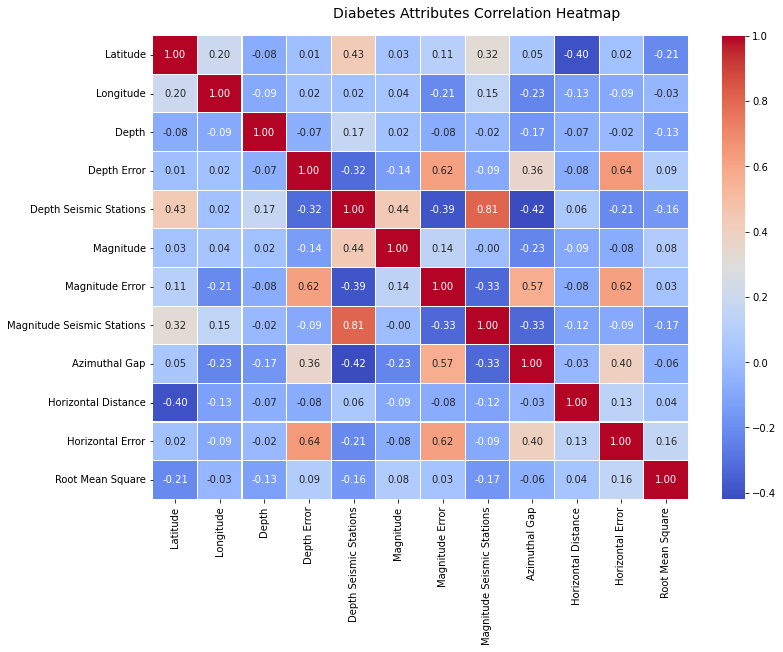

In [13]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(12, 8))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Diabetes Attributes Correlation Heatmap', fontsize=14)

In [59]:
df = df[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
df.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [60]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
Date,0,0.0
Time,0,0.0
Latitude,0,0.0
Longitude,0,0.0
Depth,0,0.0
Magnitude,0,0.0


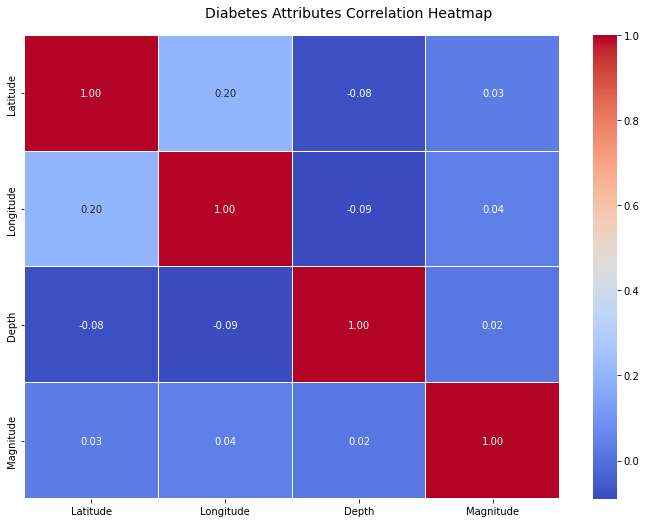

In [15]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(12, 8))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Diabetes Attributes Correlation Heatmap', fontsize=14)

Since the data is random, so we need to scale it based on the model inputs.

Converting the given date and time to Unix time which is in seconds and a number.

In [61]:
timestamp = []
for d, t in zip(df['Date'], df['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        # print('ValueError')
        timestamp.append('ValueError')
timeStamp = pd.Series(timestamp)
df['Timestamp'] = timeStamp.values
final_df = df.drop(['Date', 'Time'], axis=1)
final_df = final_df[final_df.Timestamp != 'ValueError']
final_df.head()

,Latitude,Longitude,Depth,Magnitude,Timestamp
0,19.246,145.616,131.6,6.0,-157630542.0
1,1.863,127.352,80.0,5.8,-157465811.0
2,-20.579,-173.972,20.0,6.2,-157355642.0
3,-59.076,-23.557,15.0,5.8,-157093817.0
4,11.938,126.427,15.0,5.8,-157026430.0


In [30]:
final_df.shape

(23409, 5)

Visualizing data on map

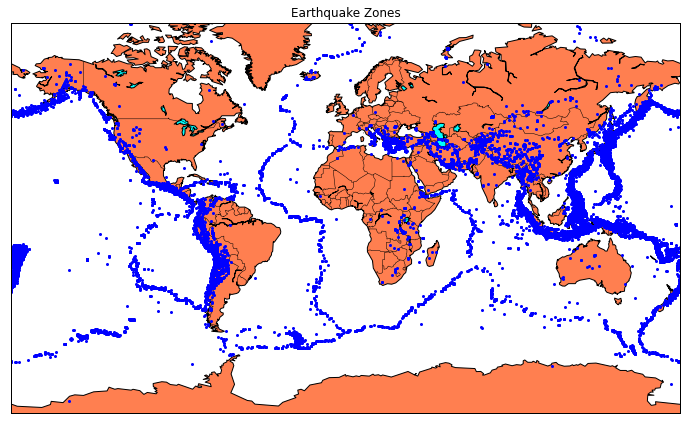

In [29]:
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = df["Longitude"].tolist()
latitudes = df["Latitude"].tolist()

x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("Earthquake Zones")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

For train test ratio of 60:40

In [65]:
X = final_df[['Timestamp', 'Latitude', 'Longitude']]
X = np.asarray(X).astype('float32')
y = final_df[['Magnitude', 'Depth']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(14045, 3) (9364, 3) (14045, 2) (9364, 3)


In [74]:
def create_model(neurons, activation, optimizer, loss):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(3,)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [77]:
model = KerasClassifier(build_fn=create_model, verbose=0)

neurons = [8, 16]
batch_size = [10]
epochs = [10]
activation = ['sigmoid', 'relu']
optimizer = ['SGD', 'Adam']
loss = ['squared_hinge']

param_grid = dict(neurons=neurons, batch_size=batch_size, epochs=epochs, activation=activation, optimizer=optimizer, loss=loss)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [78]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.813314 using {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'SGD'}
0.400000 (0.489898) with: {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 8, 'optimizer': 'SGD'}
0.000000 (0.000000) with: {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 8, 'optimizer': 'Adam'}
0.813314 (0.373371) with: {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'SGD'}
0.000000 (0.000000) with: {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'Adam'}
0.812033 (0.375934) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 8, 'optimizer': 'SGD'}
0.050481 (0.025323) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 8, 'optimizer': 'Adam'}
0.58

In [80]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(3,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='SGD', loss='squared_hinge', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(X_test, y_test))

[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Epoch 1/10
1405/1405 [==============================] - 9s 6ms/step - loss: 0.5040 - accuracy: 0.9812 - val_loss: 0.5035 - val_accuracy: 0.9811
Epoch 2/10
1405/1405 [==============================] - 5s 3ms/step - loss: 0.5040 - accuracy: 0.9812 - val_loss: 0.5035 - val_accuracy: 0.9811
Epoch 3/10
1405/1405 [==============================] - 3s 2ms/step - loss: 0.5040 - accuracy: 0.9812 - val_loss: 0.5035 - val_accuracy: 0.9811
Epoch 4/10
1405/1405 [==============================] - 3s 2ms/step - loss: 0.5040 - accuracy: 0.9812 - val_loss: 0.5035 - val_accuracy: 0.9811
Epoch 5/10
1405/1405 [==============================] - 3s 2ms/step - loss: 0.5040 - accuracy: 0.9812 - val_loss: 0.5035 - val_accuracy: 0.9811
Epoch 6/10
1405/1405 [==============================] - 3s 2ms/step - loss: 0.5040 - accuracy: 0.9812 - val_loss: 0.5035 - val_accuracy: 0.9811
Epoch 7/10
1405/1405 [==============================] - 3s 2ms/step - loss: 0.5040 - accuracy: 0.9812 - val_loss: 0.5035 - val_accuracy:

For train test ratio of 70:30

In [81]:
X = final_df[['Timestamp', 'Latitude', 'Longitude']]
X = np.asarray(X).astype('float32')
y = final_df[['Magnitude', 'Depth']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(16386, 3) (7023, 3) (16386, 2) (7023, 3)


In [82]:
def create_model(neurons, activation, optimizer, loss):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(3,)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [83]:
model = KerasClassifier(build_fn=create_model, verbose=0)

neurons = [8, 16]
batch_size = [10]
epochs = [10]
activation = ['sigmoid', 'relu']
optimizer = ['SGD', 'Adam']
loss = ['squared_hinge']

param_grid = dict(neurons=neurons, batch_size=batch_size, epochs=epochs, activation=activation, optimizer=optimizer, loss=loss)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [84]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.787916 using {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'SGD'}
0.399329 (0.465370) with: {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 8, 'optimizer': 'SGD'}
0.000000 (0.000000) with: {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 8, 'optimizer': 'Adam'}
0.587916 (0.480538) with: {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'SGD'}
0.000000 (0.000000) with: {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'Adam'}
0.786451 (0.394100) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 8, 'optimizer': 'SGD'}
0.600000 (0.489898) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 8, 'optimizer': 'Adam'}
0.78791

In [86]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(3,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='SGD', loss='squared_hinge', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(X_test, y_test))

[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Epoch 1/10
1639/1639 [==============================] - 6s 3ms/step - loss: 0.5040 - accuracy: 0.9808 - val_loss: 0.5033 - val_accuracy: 0.9819
Epoch 2/10
1639/1639 [==============================] - 4s 2ms/step - loss: 0.5040 - accuracy: 0.9808 - val_loss: 0.5033 - val_accuracy: 0.9819
Epoch 3/10
1639/1639 [==============================] - 3s 2ms/step - loss: 0.5040 - accuracy: 0.9808 - val_loss: 0.5033 - val_accuracy: 0.9819
Epoch 4/10
1639/1639 [==============================] - 4s 2ms/step - loss: 0.5040 - accuracy: 0.9808 - val_loss: 0.5033 - val_accuracy: 0.9819
Epoch 5/10
1639/1639 [==============================] - 3s 2ms/step - loss: 0.5040 - accuracy: 0.9808 - val_loss: 0.5033 - val_accuracy: 0.9819
Epoch 6/10
1639/1639 [==============================] - 3s 2ms/step - loss: 0.5040 - accuracy: 0.9808 - val_loss: 0.5033 - val_accuracy: 0.9819
Epoch 7/10
1639/1639 [==============================] - 3s 2ms/step - loss: 0.5040 - accuracy: 0.9808 - val_loss: 0.5033 - val_accuracy:


For train test ratio of 80:20

In [87]:
X = final_df[['Timestamp', 'Latitude', 'Longitude']]
X = np.asarray(X).astype('float32')
y = final_df[['Magnitude', 'Depth']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(18727, 3) (4682, 3) (18727, 2) (4682, 3)


In [88]:
def create_model(neurons, activation, optimizer, loss):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(3,)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [89]:
model = KerasClassifier(build_fn=create_model, verbose=0)

neurons = [8, 16]
batch_size = [10]
epochs = [10]
activation = ['sigmoid', 'relu']
optimizer = ['SGD', 'Adam']
loss = ['squared_hinge']

param_grid = dict(neurons=neurons, batch_size=batch_size, epochs=epochs, activation=activation, optimizer=optimizer, loss=loss)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [90]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.786759 using {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 8, 'optimizer': 'SGD'}
0.400000 (0.489898) with: {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 8, 'optimizer': 'SGD'}
0.000000 (0.000000) with: {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 8, 'optimizer': 'Adam'}
0.573675 (0.469020) with: {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'SGD'}
0.000000 (0.000000) with: {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'Adam'}
0.786759 (0.361868) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 8, 'optimizer': 'SGD'}
0.386702 (0.474078) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 8, 'optimizer': 'Adam'}
0.024029

In [94]:
model = Sequential()
model.add(Dense(8, activation='sigmoid', input_shape=(3,)))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='SGD', loss='squared_hinge', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(X_test, y_test))

[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Epoch 1/10
1873/1873 [==============================] - 7s 3ms/step - loss: 0.0039 - accuracy: 0.0818 - val_loss: 0.0039 - val_accuracy: 0.0758
Epoch 2/10
1873/1873 [==============================] - 4s 2ms/step - loss: 0.0038 - accuracy: 0.0818 - val_loss: 0.0039 - val_accuracy: 0.0758
Epoch 3/10
1873/1873 [==============================] - 4s 2ms/step - loss: 0.0038 - accuracy: 0.0818 - val_loss: 0.0039 - val_accuracy: 0.0758
Epoch 4/10
1873/1873 [==============================] - 3s 2ms/step - loss: 0.0038 - accuracy: 0.6650 - val_loss: 0.0039 - val_accuracy: 0.9814
Epoch 5/10
1873/1873 [==============================] - 4s 2ms/step - loss: 0.0038 - accuracy: 0.9811 - val_loss: 0.0039 - val_accuracy: 0.9814
Epoch 6/10
1873/1873 [==============================] - 6s 3ms/step - loss: 0.0038 - accuracy: 0.9811 - val_loss: 0.0039 - val_accuracy: 0.9814
Epoch 7/10
1873/1873 [==============================] - 3s 2ms/step - loss: 0.0038 - accuracy: 0.9811 - val_loss: 0.0039 - val_accuracy:

Plotting Graphs

In [98]:
val_acc = [98.109, 98.19, 98.14]
tr_rat = [0.6, 0.7, 0.8]
tr_loss = [0.5035, 0.5032, 0.0039]

No handles with labels found to put in legend.


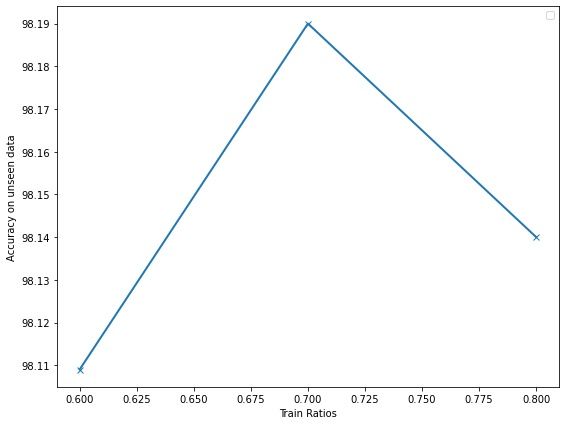

In [101]:
fig, ax = plt.subplots(figsize=[9, 7])

ax.plot(tr_rat,
         val_acc,
         marker='x', linewidth=2)
ax.set_xlabel('Train Ratios')
ax.set_ylabel('Accuracy on unseen data')
plt.legend()
plt.show()

No handles with labels found to put in legend.


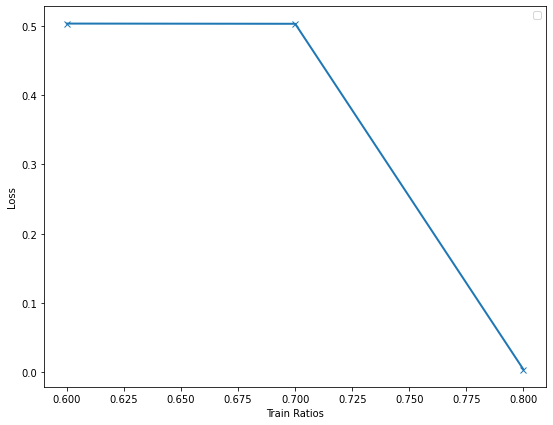

In [102]:
fig, ax = plt.subplots(figsize=[9, 7])

ax.plot(tr_rat,
         tr_loss,
         marker='x', linewidth=2)
ax.set_xlabel('Train Ratios')
ax.set_ylabel('Loss')
plt.legend()
plt.show()